<center><img src="logo_wide.png" alt="imbalanced-learn"></center>

In [1]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids,RandomUnderSampler, NearMiss, \
TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours as RENN, CondensedNearestNeighbour, \
OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

# Over sampling using imbalanced-learn library

In [2]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, n_clusters_per_class=1, 
                           weights=[0.95, 0.05], flip_y = 0, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

## Random Over Sampler Implementation

In [3]:
# Randomly over sample the minority class
ros = RandomOverSampler(sampling_strategy = "auto", random_state=42, shrinkage = 1)
X_train_ros, y_train_ros= ros.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_ros = pd.DataFrame({'feature1': X_train_ros[:, 0], 'feature2': X_train_ros[:, 1], 'target': y_train_ros})

In [4]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [5]:
# Check the target distribution in resampled df
df_ros['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [6]:
#check the original df shape
df.shape

(500, 3)

In [7]:
#check the resampled df shape
df_ros.shape

(950, 3)

In [8]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [9]:
#check duplicated values in resampled df
df_ros.duplicated().sum()

0

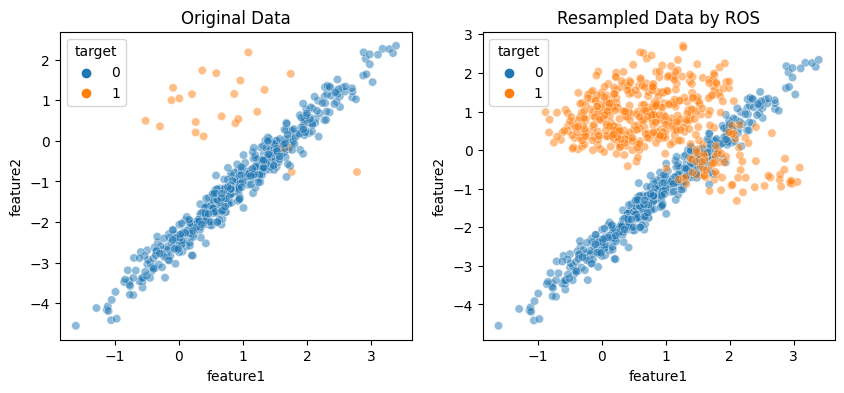

In [10]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by ROS')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.5, ax = axs[0])
sns.scatterplot(data = df_ros, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.5, ax = axs[1]);

## SMOTE Based Over Sampler Implementation

### SMOTE Basic

In [11]:
# Randomly over sample the minority class
smote = SMOTE(sampling_strategy = 'auto', random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [12]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [13]:
# Check the target distribution in resampled df
df_smote['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [14]:
#check the original df shape
df.shape

(500, 3)

In [15]:
#check the resampled df shape
df_smote.shape

(950, 3)

In [16]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [17]:
#check duplicated values in resampled df
df_smote.duplicated().sum()

0

### Borderline 1 SMOTE

In [18]:
# Randomly over sample the minority class
B1_smote = BorderlineSMOTE(sampling_strategy = 'auto', kind = 'borderline-1', random_state=42)
X_train_smote, y_train_smote= B1_smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_B1_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [19]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [20]:
# Check the target distribution in resampled df
df_B1_smote['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [21]:
#check the original df shape
df.shape

(500, 3)

In [22]:
#check the resampled df shape
df_B1_smote.shape

(950, 3)

In [23]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [24]:
#check duplicated values in resampled df
df_B1_smote.duplicated().sum()

0

### Borderline 2 SMOTE

In [25]:
# Randomly over sample the minority class
B2_smote = BorderlineSMOTE(sampling_strategy = 'auto', kind = 'borderline-2', random_state=42)
X_train_smote, y_train_smote= B2_smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_B2_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [26]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [27]:
# Check the target distribution in resampled df
df_B2_smote['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [28]:
#check the original df shape
df.shape

(500, 3)

In [29]:
#check the resampled df shape
df_B2_smote.shape

(950, 3)

In [30]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [31]:
#check duplicated values in resampled df
df_B2_smote.duplicated().sum()

0

### K-Means SMOTE

In [32]:
# Randomly over sample the minority class
KM_smote = KMeansSMOTE(sampling_strategy = 'auto', kmeans_estimator = None,  random_state=42)
X_train_smote, y_train_smote= KM_smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_KM_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [33]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [34]:
# Check the target distribution in resampled df
df_KM_smote['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [35]:
#check the original df shape
df.shape

(500, 3)

In [36]:
#check the resampled df shape
df_KM_smote.shape

(950, 3)

In [37]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [38]:
#check duplicated values in resampled df
df_KM_smote.duplicated().sum()

0

### SVM SMOTE

In [39]:
# Randomly over sample the minority class
SVM_smote = SVMSMOTE(sampling_strategy = 'auto',  random_state=42)
X_train_smote, y_train_smote= SVM_smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_SVM_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [40]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [41]:
# Check the target distribution in resampled df
df_SVM_smote['target'].value_counts().round(3)

0    475
1    475
Name: target, dtype: int64

In [42]:
#check the original df shape
df.shape

(500, 3)

In [43]:
#check the resampled df shape
df_SVM_smote.shape

(950, 3)

In [44]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [45]:
#check duplicated values in resampled df
df_SVM_smote.duplicated().sum()

0

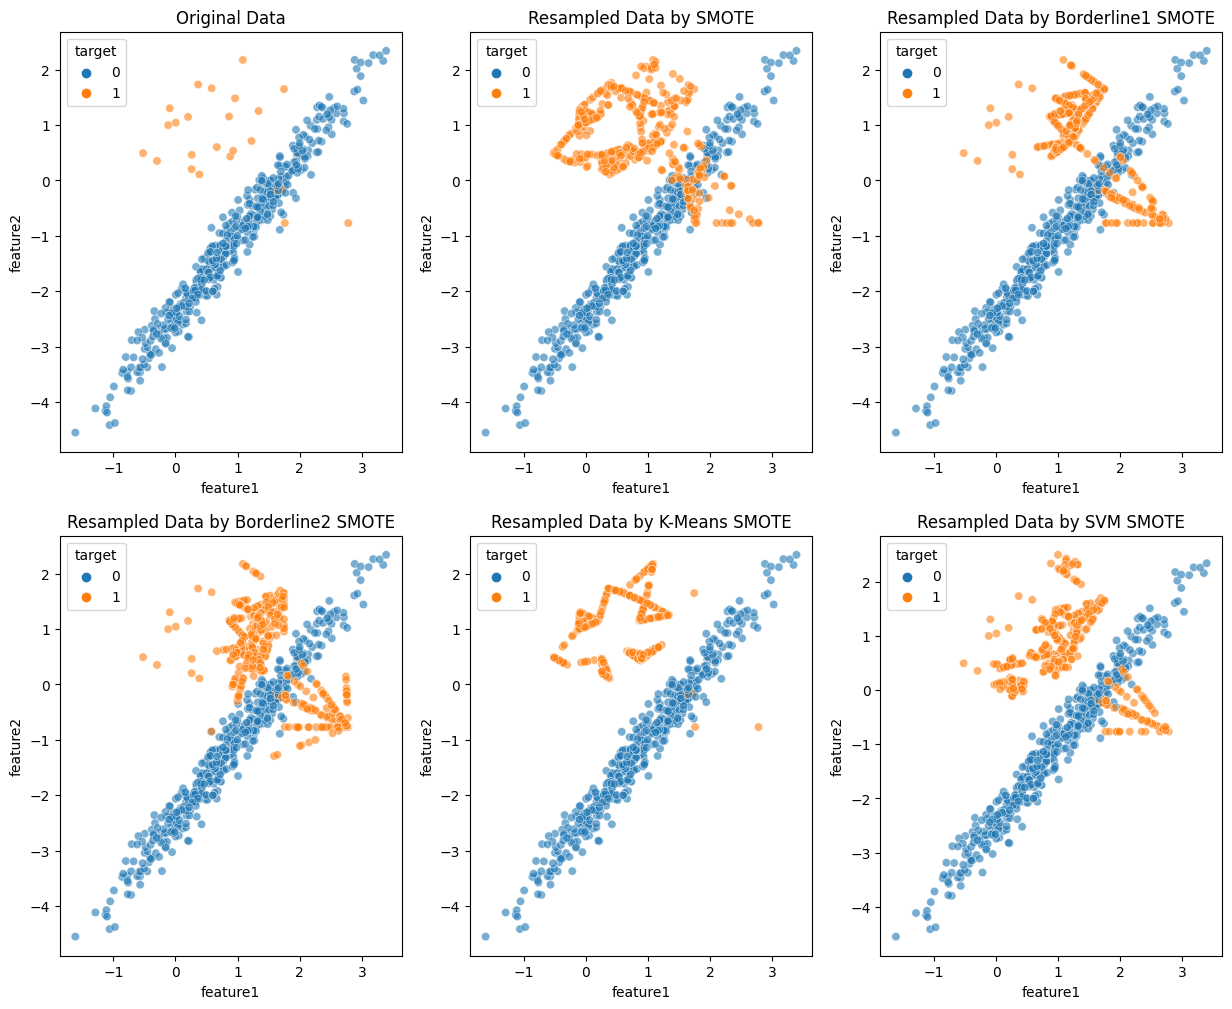

In [46]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(2,3, figsize=(15, 12))
axs[0,0].set_title('Original Data')
axs[0,1].set_title('Resampled Data by SMOTE')
axs[0,2].set_title('Resampled Data by Borderline1 SMOTE')
axs[1,0].set_title('Resampled Data by Borderline2 SMOTE')
axs[1,1].set_title('Resampled Data by K-Means SMOTE')
axs[1,2].set_title('Resampled Data by SVM SMOTE')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[0,0])
sns.scatterplot(data = df_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[0,1])
sns.scatterplot(data = df_B1_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[0,2])
sns.scatterplot(data = df_B2_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[1,0])
sns.scatterplot(data = df_KM_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[1,1])
sns.scatterplot(data = df_SVM_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.6, ax = axs[1,2]);

## ADASYN Over Sampler Implementation

In [47]:
# Randomly over sample the minority class
ADA_smote = ADASYN(sampling_strategy = 'auto',  random_state=42)
X_train_smote, y_train_smote= ADA_smote.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_ADA_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})

In [48]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    475
1     25
Name: target, dtype: int64

In [49]:
# Check the target distribution in resampled df
df_ADA_smote['target'].value_counts().round(3)

1    476
0    475
Name: target, dtype: int64

In [50]:
#check the original df shape
df.shape

(500, 3)

In [51]:
#check the resampled df shape
df_ADA_smote.shape

(951, 3)

In [52]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [53]:
#check duplicated values in resampled df
df_ADA_smote.duplicated().sum()

0

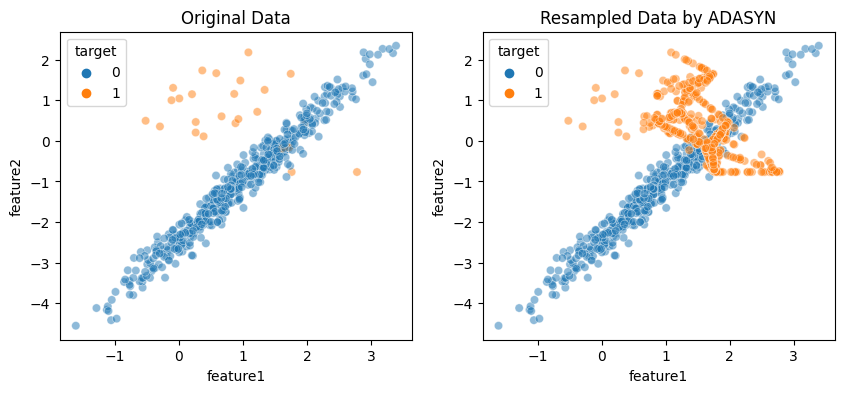

In [54]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by ADASYN')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.5, ax = axs[0])
sns.scatterplot(data = df_ADA_smote, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.5, ax = axs[1]);

# Under Sampling using imbalanced-learn library

In [55]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, n_clusters_per_class=1, 
                           weights=[0.9, 0.1], flip_y = 0, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

## Cluster Centroids Under Sampler Implementation

In [56]:
# Randomly over sample the minority class
cc = ClusterCentroids(random_state=42)
X_train_US, y_train_US= cc.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_cc = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [57]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [58]:
# Check the target distribution in resampled df
df_cc['target'].value_counts().round(3)

0    100
1    100
Name: target, dtype: int64

In [59]:
#check the original df shape
df.shape

(1000, 3)

In [60]:
#check the resampled df shape
df_cc.shape

(200, 3)

In [61]:
#check duplicated values in origianl df
df.duplicated().sum()

0

In [62]:
#check duplicated values in resampled df
df_cc.duplicated().sum()

0

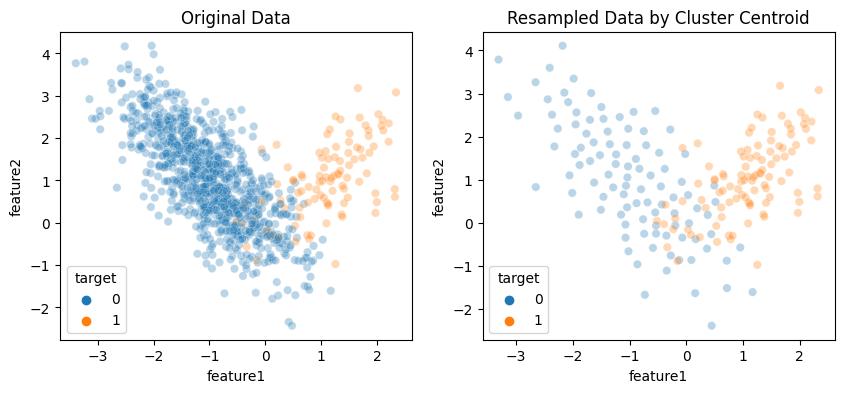

In [63]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by Cluster Centroid')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_cc, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## Random Under Sampler Implementation

In [64]:
# Randomly over sample the minority class
rus = RandomUnderSampler(random_state=42)
X_train_US, y_train_US= rus.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_rus = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [65]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [66]:
# Check the target distribution in resampled df
df_rus['target'].value_counts().round(3)

0    100
1    100
Name: target, dtype: int64

In [67]:
#check the original df shape
df.shape

(1000, 3)

In [68]:
#check the resampled df shape
df_rus.shape

(200, 3)

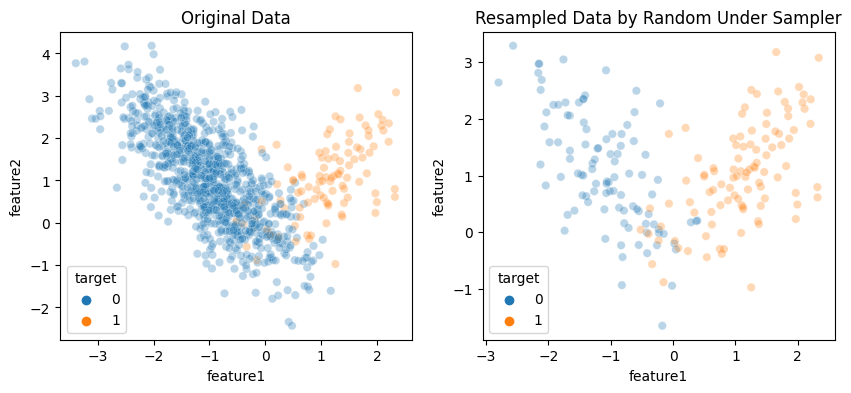

In [69]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by Random Under Sampler')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_rus, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## NearMiss Under Sampler Implementation

### Version 1

In [70]:
# Randomly over sample the minority class
nm = NearMiss(version = 1)
X_train_US, y_train_US= nm.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_nm_1 = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [71]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [72]:
# Check the target distribution in resampled df
df_nm_1['target'].value_counts().round(3)

0    100
1    100
Name: target, dtype: int64

In [73]:
#check the original df shape
df.shape

(1000, 3)

In [74]:
#check the resampled df shape
df_nm_1.shape

(200, 3)

### Version 2

In [75]:
# Randomly over sample the minority class
nm = NearMiss(version = 2)
X_train_US, y_train_US= nm.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_nm_2 = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [76]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [77]:
# Check the target distribution in resampled df
df_nm_2['target'].value_counts().round(3)

0    100
1    100
Name: target, dtype: int64

In [78]:
#check the original df shape
df.shape

(1000, 3)

In [79]:
#check the resampled df shape
df_nm_2.shape

(200, 3)

### Version 3

In [80]:
# Randomly over sample the minority class
nm_3 = NearMiss(version = 3)
X_train_US, y_train_US= nm_3.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_nm_3 = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

C:\Users\tsoam\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [81]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [82]:
# Check the target distribution in resampled df
df_nm_3['target'].value_counts().round(3)

1    100
0     63
Name: target, dtype: int64

In [83]:
#check the original df shape
df.shape

(1000, 3)

In [84]:
#check the resampled df shape
df_nm_3.shape

(163, 3)

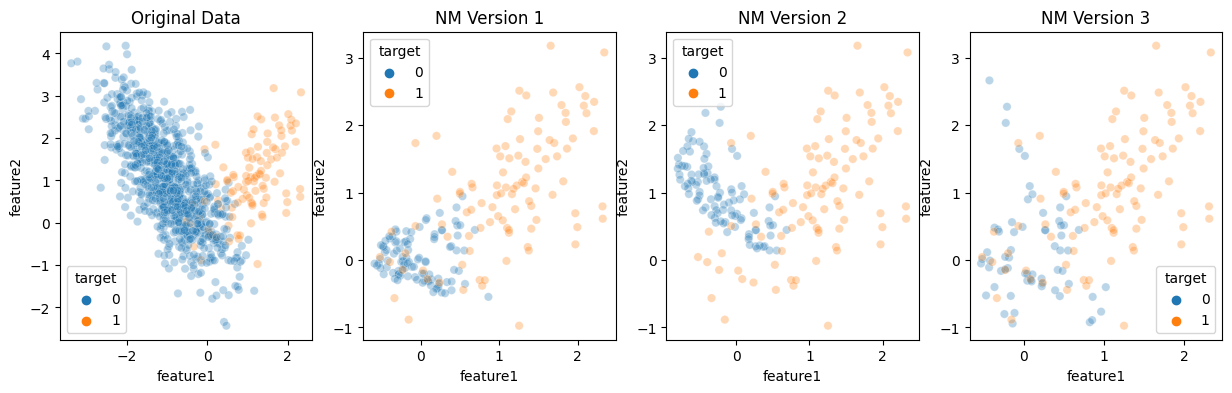

In [85]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,4, figsize=(15, 4))
axs[0].set_title('Original Data')
axs[1].set_title('NM Version 1')
axs[2].set_title('NM Version 2')
axs[3].set_title('NM Version 3')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_nm_1, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1])
sns.scatterplot(data = df_nm_2, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[2])
sns.scatterplot(data = df_nm_3, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[3]);

## TomekLinks Under Sampler Implementation

In [86]:
# Randomly over sample the minority class
tl = TomekLinks(sampling_strategy='auto')
X_train_US, y_train_US= tl.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_tl = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [87]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [88]:
# Check the target distribution in resampled df
df_tl['target'].value_counts().round(3)

0    889
1    100
Name: target, dtype: int64

In [89]:
#check the original df shape
df.shape

(1000, 3)

In [90]:
#check the resampled df shape
df_tl.shape

(989, 3)

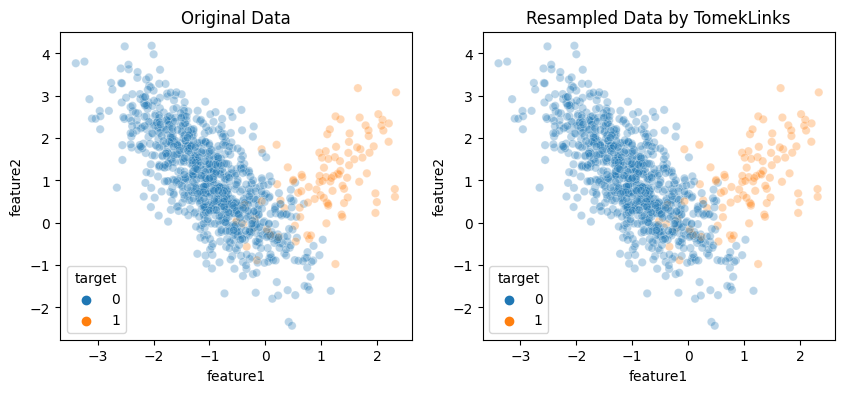

In [91]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by TomekLinks')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_tl, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## EditedNN Under Sampler Implementation

In [92]:
# Randomly over sample the minority class
enn = EditedNearestNeighbours(sampling_strategy='auto', kind_sel = "all", n_neighbors = 5)
X_train_US, y_train_US= enn.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_enn = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [93]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [94]:
# Check the target distribution in resampled df
df_enn['target'].value_counts().round(3)

0    826
1    100
Name: target, dtype: int64

In [95]:
#check the original df shape
df.shape

(1000, 3)

In [96]:
#check the resampled df shape
df_enn.shape

(926, 3)

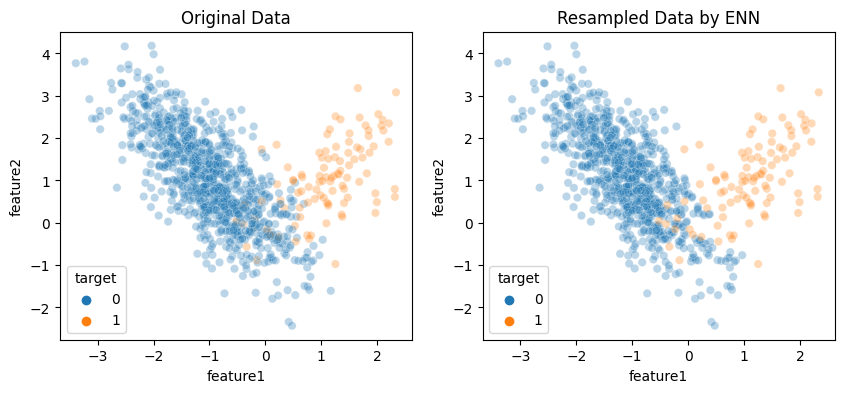

In [97]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by ENN')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_enn, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## Repeated ENN Under Sampler Implementation

In [98]:
# Randomly over sample the minority class
renn = RENN(sampling_strategy='auto', kind_sel = "all", n_neighbors = 10)
X_train_US, y_train_US= renn.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_renn = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [99]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [100]:
# Check the target distribution in resampled df
df_renn['target'].value_counts().round(3)

0    701
1    100
Name: target, dtype: int64

In [101]:
#check the original df shape
df.shape

(1000, 3)

In [102]:
#check the resampled df shape
df_renn.shape

(801, 3)

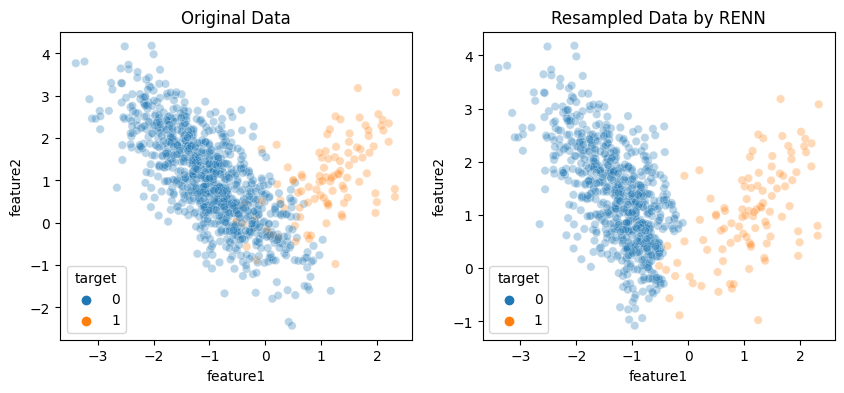

In [103]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by RENN')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_renn, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## CondensedNearestNeighbour Under Sampler Implementation

In [104]:
# Randomly over sample the minority class
cnn = CondensedNearestNeighbour(sampling_strategy='auto', random_state = 42)
X_train_US, y_train_US= cnn.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_cnn = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [105]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [106]:
# Check the target distribution in resampled df
df_cnn['target'].value_counts().round(3)

1    100
0     68
Name: target, dtype: int64

In [107]:
#check the original df shape
df.shape

(1000, 3)

In [108]:
#check the resampled df shape
df_cnn.shape

(168, 3)

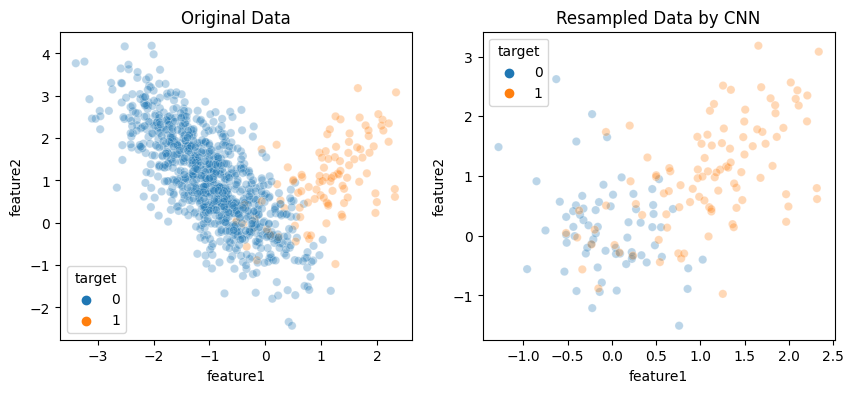

In [109]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by CNN')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_cnn, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## OneSidedSelection Under Sampler Implementation

In [110]:
# Randomly over sample the minority class
oss = OneSidedSelection(sampling_strategy='auto', random_state = 42)
X_train_US, y_train_US= oss.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_oss = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [111]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [112]:
# Check the target distribution in resampled df
df_oss['target'].value_counts().round(3)

0    883
1    100
Name: target, dtype: int64

In [113]:
#check the original df shape
df.shape

(1000, 3)

In [114]:
#check the resampled df shape
df_oss.shape

(983, 3)

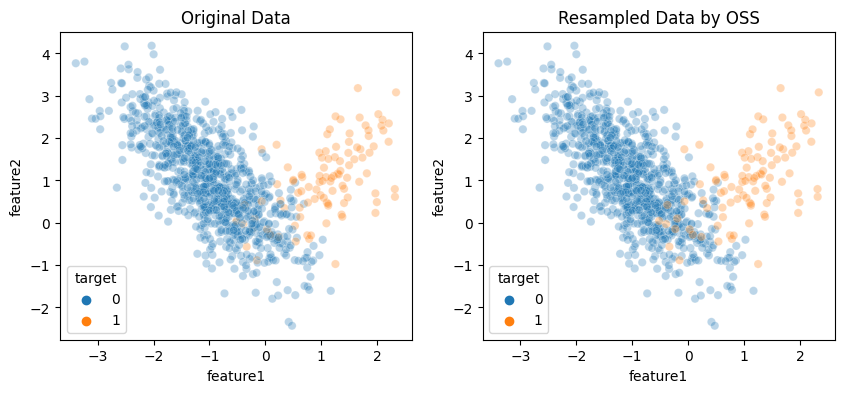

In [115]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by OSS')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_oss, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## NeighbourhoodCleaningRule Under Sampler Implementation

In [116]:
# Randomly over sample the minority class
ncr = NeighbourhoodCleaningRule()
X_train_US, y_train_US= ncr.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_ncr = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [117]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [118]:
# Check the target distribution in resampled df
df_ncr['target'].value_counts().round(3)

0    844
1    100
Name: target, dtype: int64

In [119]:
#check the original df shape
df.shape

(1000, 3)

In [120]:
#check the resampled df shape
df_ncr.shape

(944, 3)

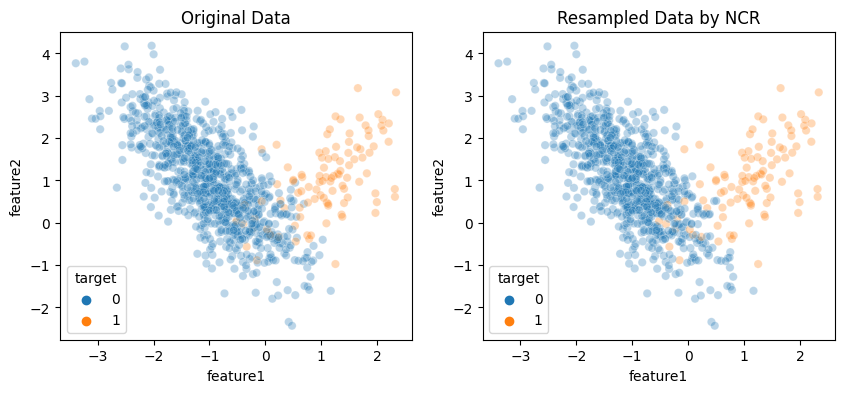

In [121]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by NCR')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_ncr, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

## InstanceHardnessThreshold Under Sampler Implementation

In [122]:
# Randomly over sample the minority class
from sklearn.linear_model import LogisticRegression
iht = InstanceHardnessThreshold(estimator=LogisticRegression(), random_state = 42)
X_train_US, y_train_US= iht.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_iht= pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [123]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [124]:
# Check the target distribution in resampled df
df_iht['target'].value_counts().round(3)

0    100
1    100
Name: target, dtype: int64

In [125]:
#check the original df shape
df.shape

(1000, 3)

In [126]:
#check the resampled df shape
df_iht.shape

(200, 3)

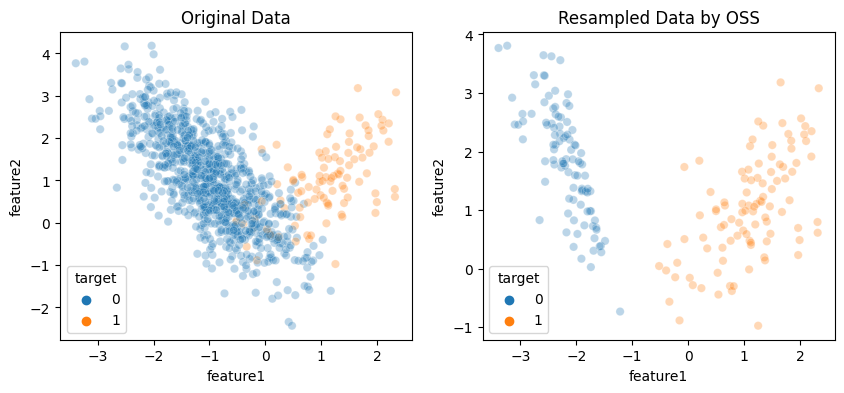

In [127]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by OSS')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_iht, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

# Both Over and Under Sampling using imbalanced-learn library

In [128]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, n_clusters_per_class=1, 
                           weights=[0.9, 0.1], flip_y = 0, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

### SMOTEENN Combined Sampler Implementation

In [129]:
# Randomly over sample the minority class
smote_enn = SMOTEENN(sampling_strategy='auto', random_state = 42)
X_train_US, y_train_US= smote_enn.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_smote_enn = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [130]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [131]:
# Check the target distribution in resampled df
df_smote_enn['target'].value_counts().round(3)

1    814
0    796
Name: target, dtype: int64

In [132]:
#check the original df shape
df.shape

(1000, 3)

In [133]:
#check the resampled df shape
df_smote_enn.shape

(1610, 3)

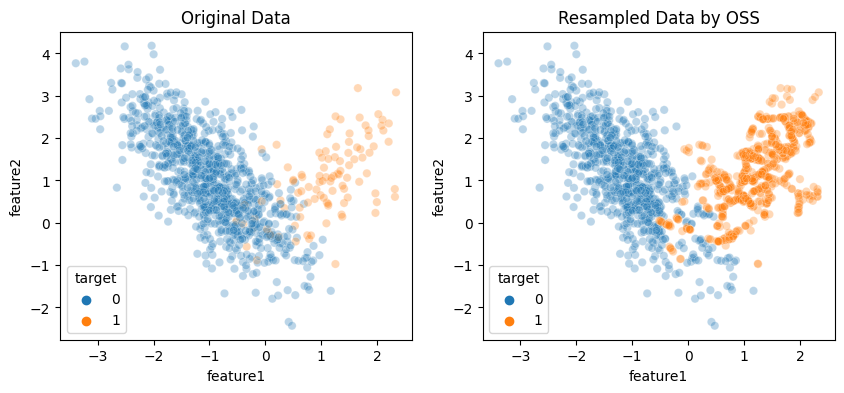

In [134]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by OSS')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_smote_enn, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);

### SMOTETomek Combined Sampler Implementation

In [135]:
# Randomly over sample the minority class
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state = 42)
X_train_US, y_train_US= smote_tomek.fit_resample(X, y)
# Convert the data from numpy array to a pandas dataframe
df_smote_tomek = pd.DataFrame({'feature1': X_train_US[:, 0], 'feature2': X_train_US[:, 1], 'target': y_train_US})

In [136]:
# Check the target distribution in original df
df['target'].value_counts().round(3)

0    900
1    100
Name: target, dtype: int64

In [137]:
# Check the target distribution in resampled df
df_smote_tomek['target'].value_counts().round(3)

0    877
1    877
Name: target, dtype: int64

In [138]:
#check the original df shape
df.shape

(1000, 3)

In [139]:
#check the resampled df shape
df_smote_tomek.shape

(1754, 3)

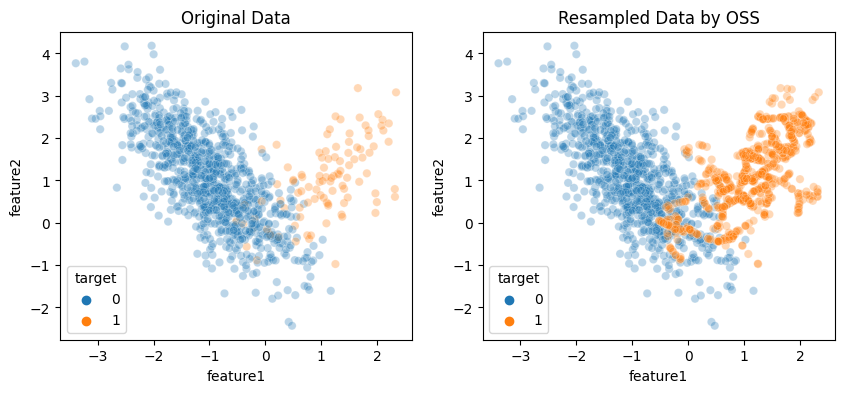

In [140]:
# Visualize the original data and resampled data
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].set_title('Original Data')
axs[1].set_title('Resampled Data by OSS')
sns.scatterplot(data = df, x = 'feature1', y = 'feature2', hue = 'target', alpha =  0.3, ax = axs[0])
sns.scatterplot(data = df_smote_tomek, x = 'feature1', y = 'feature2', hue = 'target',  alpha = 0.3, ax = axs[1]);